<a href="https://colab.research.google.com/github/learnsomething2/DSR_DS_Fundamental/blob/main/iris_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install scikit-learn
#using for machinelearning to differ flowers of iris 
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

iris =  datasets.load_iris()
# make train test split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)


In [2]:
x_train.shape

(120, 4)

In [3]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [4]:
#@title
model = LogisticRegression(penalty='l2', C=100, max_iter=1000)

model.fit(x_train, y_train)

LogisticRegression(C=100, max_iter=1000)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



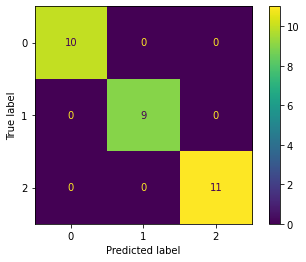

In [5]:
y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred)).plot()


In [6]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_search = GridSearchCV(model, param_grid)
grid_search.fit(iris.data, iris.target)


GridSearchCV(estimator=LogisticRegression(C=100, max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2']})

In [7]:
results = grid_search.cv_results_
print(grid_search.get_params)

<bound method BaseEstimator.get_params of GridSearchCV(estimator=LogisticRegression(C=100, max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2']})>


In [8]:
import pandas as pd
df = pd.DataFrame(results)
df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010143,0.002082,0.000514,0.000057,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.733333,0.766667,0.666667,0.800000,0.733333,0.740000,0.044222,7
1,0.014422,0.000905,0.000513,0.000071,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.766667,0.933333,0.766667,0.900000,0.933333,0.860000,0.077172,6
2,0.033409,0.012216,0.000587,0.000048,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.866667,0.966667,0.933333,0.966667,1.000000,0.946667,0.045216,5
3,0.083112,0.026257,0.001587,0.001338,1,l2,"{'C': 1, 'penalty': 'l2'}",0.966667,1.000000,0.933333,0.966667,1.000000,0.973333,0.024944,2
4,0.066287,0.017077,0.000600,0.000027,10,l2,"{'C': 10, 'penalty': 'l2'}",0.966667,1.000000,0.966667,0.933333,1.000000,0.973333,0.024944,2
5,0.090962,0.023685,0.000600,0.000053,100,l2,"{'C': 100, 'penalty': 'l2'}",1.000000,1.000000,0.966667,0.933333,1.000000,0.980000,0.026667,1
6,0.131850,0.028935,0.000522,0.000049,1000,l2,"{'C': 1000, 'penalty': 'l2'}",1.000000,1.000000,0.933333,0.933333,1.000000,0.973333,0.032660,2


In [9]:
df [['params', 'rank_test_score']]

,params,rank_test_score
0,"{'C': 0.001, 'penalty': 'l2'}",7
1,"{'C': 0.01, 'penalty': 'l2'}",6
2,"{'C': 0.1, 'penalty': 'l2'}",5
3,"{'C': 1, 'penalty': 'l2'}",2
4,"{'C': 10, 'penalty': 'l2'}",2
5,"{'C': 100, 'penalty': 'l2'}",1
6,"{'C': 1000, 'penalty': 'l2'}",2
